### **XGBoost** for Predicting Parking Occupancy Status on **Feature Engineered Dataset**

In [1]:
# Install xgboost if already not installed
!pip install xgboost

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # Import LabelEncoder here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the feature engineered IoT Smart Parking dataset
df = pd.read_csv('IoT_SmartParking_Processed.csv')

# Inspect the data
print(df.head())

# Preprocessing
# Assuming 'occupied_spots' is the target variable and other columns are features
# The original code used 'occupancy', which was not in the DataFrame
target_column = 'Occupancy_Status'
features = [col for col in df.columns if col != target_column and col != 'Timestamp' and df[col].dtype != object]

X = df[features].values
y = df[target_column].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable to numeric using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    colsample_bytree=0.3,         # Fraction of features to use for building trees
    learning_rate=0.1,            # Step size at each iteration while moving towards a minimum
    max_depth=5,                  # Maximum depth of the trees
    alpha=10,                     # L1 regularization term on weights
    n_estimators=100,             # Number of trees to build
    n_jobs=-1                     # Use all CPU threads
)

# Train the model

# Prepare the evaluation data
evals = [(X_train, y_train), (X_test, y_test)]

# Fit the model while tracking evaluation results
evals_result = {}
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Get the loss values from evals_result (stored during training)
#vals_result = model.evals_result()

# Extract the logloss for training and validation data
#train_loss = evals_result['validation_0']['logloss']
#val_loss = evals_result['validation_1']['logloss']

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the model parameters (Hyperparameters used for training)
print("Model Parameters:")
print(model.get_params())

# Example if you're using pandas DataFrame
#model.feature_names = X_train.columns.tolist()  # Assuming X_train is a pandas DataFrame

print("Model Features:")
print(features)

# Print the number of trees and booster structure (model summary)
# Print the number of trees (using n_estimators)
print(f"\nNumber of trees in the model: {model.get_params()['n_estimators']}")

# Optionally, dump the model structure to a text file
model.get_booster().dump_model('xgboost_model_dump.txt', with_stats=True)

                       Timestamp  Parking_Spot_ID  Sensor_Reading_Proximity  \
0  2021-01-01 00:00:00.000000000               20                  1.023651   
1  2021-01-02 06:39:16.756756756               49                  3.903349   
2  2021-01-03 13:18:33.513513513               38                 10.315709   
3  2021-01-04 19:57:50.270270270               31                  6.588039   
4  2021-01-06 02:37:07.027027027                8                  8.213969   

   Sensor_Reading_Pressure  Vehicle_Type_Weight  Vehicle_Type_Height  \
0                 1.541461          1831.770127             4.392528   
1                 1.621719          1330.815754             4.595638   
2                 6.292374          1255.134827             4.313721   
3                 1.659870          1523.442919             3.567329   
4                 3.278467          1758.490837             5.145836   

    User_Type  Weather_Temperature  Weather_Precipitation  \
0     Visitor            18.092

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'data.csv' with your actual file)
df = pd.read_csv("IoT_SmartParking_Processed.csv")

# Preprocessing
target_column = 'Occupancy_Status'
features = [col for col in df.columns if col != target_column and col != 'Timestamp' and df[col].dtype != object]

X = df[features].values
y = df[target_column].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable to numeric using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    colsample_bytree=0.3,         # Fraction of features to use for building trees
    learning_rate=0.1,            # Step size at each iteration while moving towards a minimum
    max_depth=5,                  # Maximum depth of the trees
    alpha=10,                     # L1 regularization term on weights
    n_estimators=100,             # Number of trees to build
    n_jobs=-1                     # Use all CPU threads
)

# Prepare the evaluation data
evals = [(X_train, y_train), (X_test, y_test)]

# Fit the model while tracking evaluation results
evals_result = {}
model.fit(X_train, y_train, eval_set=evals, verbose=True)

# Get the predictions
y_pred = model.predict(X_test)

# Get the loss values from evals_result (stored during training)
evals_result = model.evals_result()

# Extract the logloss for training and validation data
train_loss = evals_result['validation_0']['logloss']
val_loss = evals_result['validation_1']['logloss']

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the model parameters
print("Model Parameters:")
print(model.get_params())

[0]	validation_0-logloss:0.68531	validation_1-logloss:0.69696
[1]	validation_0-logloss:0.68305	validation_1-logloss:0.69632
[2]	validation_0-logloss:0.67933	validation_1-logloss:0.69447
[3]	validation_0-logloss:0.67674	validation_1-logloss:0.69494
[4]	validation_0-logloss:0.58898	validation_1-logloss:0.60463
[5]	validation_0-logloss:0.58686	validation_1-logloss:0.60376
[6]	validation_0-logloss:0.58368	validation_1-logloss:0.60326
[7]	validation_0-logloss:0.58173	validation_1-logloss:0.60090
[8]	validation_0-logloss:0.57975	validation_1-logloss:0.60043
[9]	validation_0-logloss:0.50915	validation_1-logloss:0.52737
[10]	validation_0-logloss:0.50745	validation_1-logloss:0.52748
[11]	validation_0-logloss:0.44853	validation_1-logloss:0.46636
[12]	validation_0-logloss:0.44801	validation_1-logloss:0.46567
[13]	validation_0-logloss:0.44661	validation_1-logloss:0.46528
[14]	validation_0-logloss:0.39684	validation_1-logloss:0.41356
[15]	validation_0-logloss:0.39607	validation_1-logloss:0.41271
[1

<Figure size 1000x600 with 0 Axes>

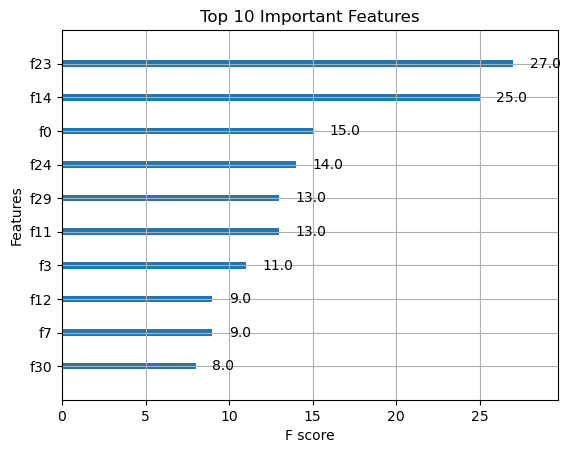

In [15]:
# Print feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', max_num_features=10, title="Top 10 Important Features")
plt.show()

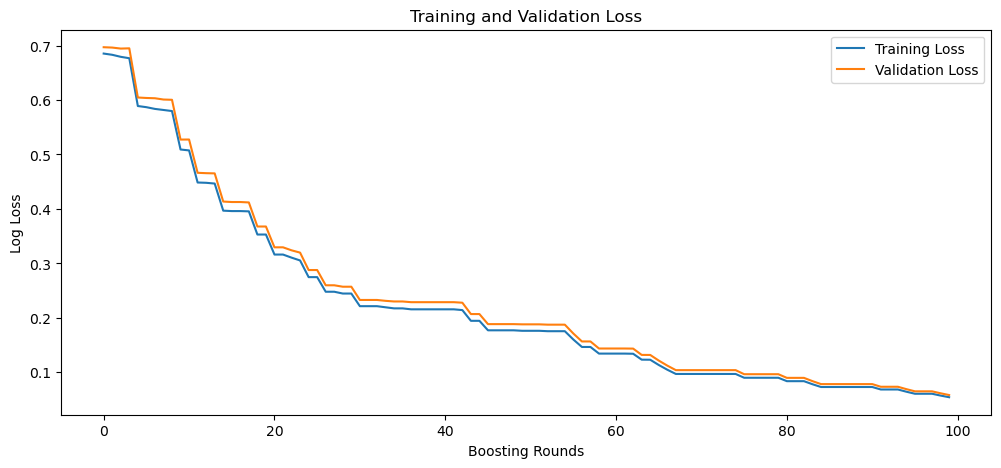

In [16]:
# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### As can be seen above,  the training and validation loss curves are well aligned
### and loss exponentially reduced

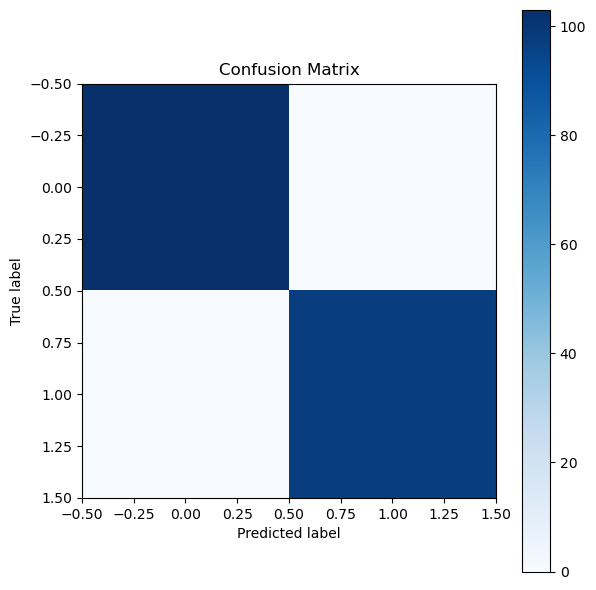

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [17]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

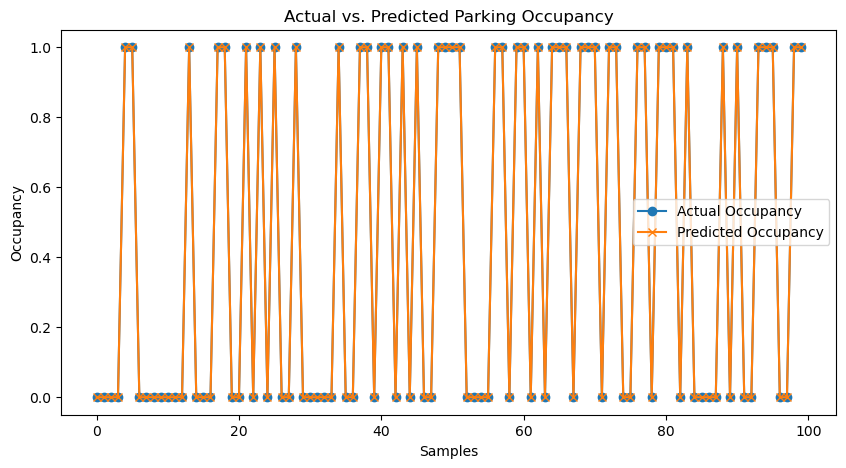

In [18]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual Occupancy', marker='o')
plt.plot(y_pred[:100], label='Predicted Occupancy', marker='x')
plt.xlabel('Samples')
plt.ylabel('Occupancy')
plt.legend()
plt.title('Actual vs. Predicted Parking Occupancy')
plt.show()

### As can be seen above F1-Score, Accuracy, Precision and Recall of 100% achieved using **XGBoost**
### for prediction of Parking Occupancy Status using **Feature Engineered** Dataset